In [1]:
import PIL
import requests
import numpy as np
from io import BytesIO
from IPython.display import Image

import tensorflow as tf

## Use base keras instead of tf.keras because of: https://github.com/tensorflow/tensorflow/issues/11868
# from tensorflow.contrib.keras.python.keras import applications
# from tensorflow.contrib.keras.python.keras.preprocessing import image
# from tensorflow.contrib.keras.python.keras.applications import imagenet_utils
##
from keras import applications
from keras.preprocessing import image
from keras.applications import imagenet_utils
##

Using TensorFlow backend.


In [2]:
resnet50 = applications.ResNet50(weights="imagenet")

In [3]:
resnet50.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

We can see that the input needs to be `(224, 224, 3)`

Download an image resize it and drop to make it `224x224`

In [16]:
url = "https://www.euroresidentes.com/suenos/img_suenos/caballo-suenos-euroresidentes.jpg"

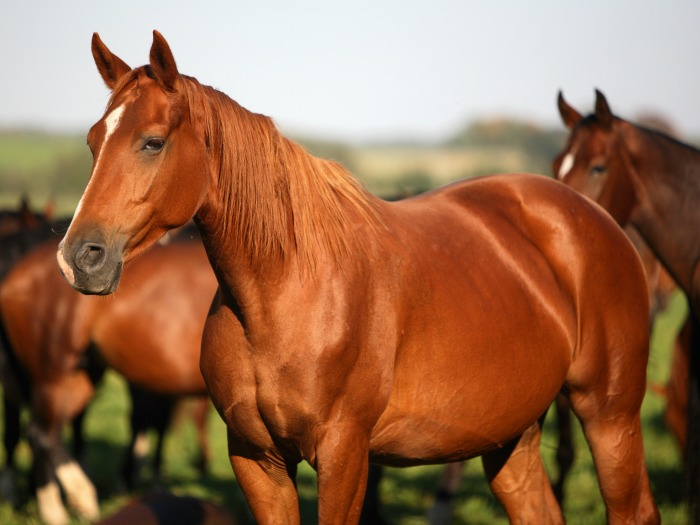

In [17]:
Image(url, width=224, height=224)

In [18]:
response = requests.get(url)

In [19]:
img = image.load_img(BytesIO(response.content), target_size=(224, 224))

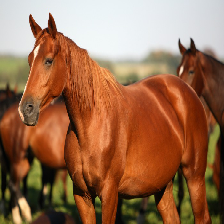

In [20]:
img

In [21]:
arr = image.img_to_array(img)

In [22]:
arr.shape

(224, 224, 3)

In [23]:
queries = np.expand_dims(arr, axis=0)

In [24]:
queries = imagenet_utils.preprocess_input(queries)

In [25]:
predictions = resnet50.predict(queries)

In [26]:
predictions[0, :5]

array([  4.02258560e-10,   5.10448128e-09,   2.07071871e-08,
         1.30272682e-08,   1.34326161e-09], dtype=float32)

In [27]:
imagenet_utils.decode_predictions(predictions)

[[('n02389026', 'sorrel', 0.9978435),
  ('n02422106', 'hartebeest', 0.001561445),
  ('n04604644', 'worm_fence', 0.0001364218),
  ('n02107142', 'Doberman', 6.8106092e-05),
  ('n02403003', 'ox', 5.1211431e-05)]]

"Sorrel" is indeed a type of horse.